<h1 style="font-size:180%; color:#0000FF;"><i><b>OpenFood. EDA: Time-series data</b></i></h1>

### Import Libraries

In [2]:
import numpy as np 
import pandas as pd 
import os

#Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns


#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Absolute and Relative paths

In [3]:
dirname = os.path.dirname('../input/openfood/')
filename = os.path.join(dirname, 'data_385k.pkl')

In [4]:
filename

'../input/openfood/data_385k.pkl'

#### Import the data as a pandas DataFrame into your notebook.

Since it's a pickle file, I was NOT able to parse dates when I loaded the file. I'll try it on a next step.

Display a few entries. 

In [5]:
df = pd.read_pickle('../input/openfood/data_385k.pkl', compression='zip')
df.head(3)

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,NaN,NaN,75.00,37.50,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,7610809001066,NaN,NaN,1.50,1.13,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8002530159021,NaN,NaN,52.68,NaN,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


"Although the Open Food database is not a time-series database, it contains several columns with dates and times, allowing for a simple investigation. In this task, you will work with the **created_at column** that stores the date and time at which products were added to the Open Food database. You will analyze the total **number of products added** to the database."

### Create a sub-dataframe with the columns that we are interested.

Country column will provide the number of entries of each item produced by each country.

Created_at column is the timestamp of the time series.

In [6]:
#Create a sub-dataframe with the columns that we are interested.

items = df[['country', 'created_at']]
items

,country,created_at
0,CH,2016-06-01T11:42:22.908Z
1,CH,2016-06-01T11:42:25.111Z
2,CH,2016-06-01T11:42:25.900Z
3,CH,2016-06-01T11:42:26.184Z
4,CH,2016-06-01T11:42:26.350Z
...,...,...
385379,CH,2021-10-04T14:08:42.215Z
385380,CH,2021-10-04T14:12:06.476Z
385381,CH,2021-10-04T14:22:10.685Z
385382,CH,2021-10-04T14:27:36.157Z


### Parse date (column create_at)

In [7]:
#Don't need all these new columns. But I displayed them to learn

items['created_at'] = pd.to_datetime(items['created_at'], utc=True)
items['date'] = items['created_at'].dt.date
items['time'] = items['created_at'].dt.time
items["year"] = items["created_at"].dt.year
items["month"] = items["created_at"].dt.month
items["day"] = items["created_at"].dt.day
items['hour'] = items['created_at'].dt.hour
items.head(3)

,country,created_at,date,time,year,month,day,hour
0,CH,2016-06-01 11:42:22.908000+00:00,2016-06-01,11:42:22.908000,2016,6,1,11
1,CH,2016-06-01 11:42:25.111000+00:00,2016-06-01,11:42:25.111000,2016,6,1,11
2,CH,2016-06-01 11:42:25.900000+00:00,2016-06-01,11:42:25.900000,2016,6,1,11


### That's our pivot_table

I tried to use ax.set(xlabel="", ylabel="") to assign our x-axis (hours) and the y-axis (months). However, it took so long that I gave up cause the pivot_table is faster. 

The pivot_table will be used to plot the heatmap of the task. On the pivot_table the index (y-axis) and the columns (x-axis) of the heatmap/chart will be assigned. 

The course defined a function to count the values of country (the chosen column).

We can also apply aggfunc='count' on the pivot_table, instead of writring the initial def count_x(x) function.

In [8]:
#Source Hierarquical Indexing unit 07:

#Count the number of items from each country, and set zero if there is no item
def count_x(x):
    return np.count_nonzero(x)


#pivot-table
items.pivot_table(
    index=["month"],
    columns=["hour"],
    values="country",
    aggfunc= count_x,
    fill_value=0 # Nan are filled by 0
)

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,3,60,164,264,...,89,57,16,32,38,13,16,0,1,0
2,0,0,0,0,0,0,0,6,251,174,...,73,45,11,12,3,51,16,99,0,0
3,0,0,0,0,0,0,3,56,406,332,...,542,549,119,90,12,31,496,13,0,1
4,0,8,0,0,16,105,378,261,257,264,...,173,39,22,28,6,213,24,186,0,0
5,0,0,2,0,1,0,21,148,166,91,...,98,58,19,170,67,25,0,0,0,0
6,4,0,18,0,0,1,244,154,152,190,...,353,162,195,605,211,9,22,49,743,44
7,397,95,0,0,0,1,1164,204,115,115,...,122,174,1052,394,311,498,1561,509,427,521
8,19,14,10,3,0,10,41,334,132,414,...,153,140,249,145,125,244,106,52,33,5
9,0,0,0,1,5,295,532,297,1038,641,...,309,384,1440,2366,2460,1692,262,370,1,0


### Pivot_table observations: More items created between 06:00 and 19:00

According to the pivot_table above, most part of the items are created between 6am and 7pm. Which are industrial working hours.

There are less values at the beginning of the day (0:00 - 06:00). And decreases after 19:00 till 23:00.

Cause the productivity on night-shifts is lower, depending on the industrial/comercial activity and processes.

### Applying aggfunc='count'  and define items pivot to plot the heatmap.

In [9]:
items_pivot = items.pivot_table(index=['month'], columns='hour', values='country', aggfunc='count', fill_value=0)
#items_pivot  #It's the same pivot_table above

## Task E1. Heatmap items created each month at each hour

"Your task is to investigate the total number of items created each month at each hour. You should use the created_at column to draw a heatmap with the hours (0 to 23) on the x-axis and the months (1 to 12) on the y-axis. The color of the heatmap should show the number of items created at each month-hour pair. As always include any observations and their discussion."

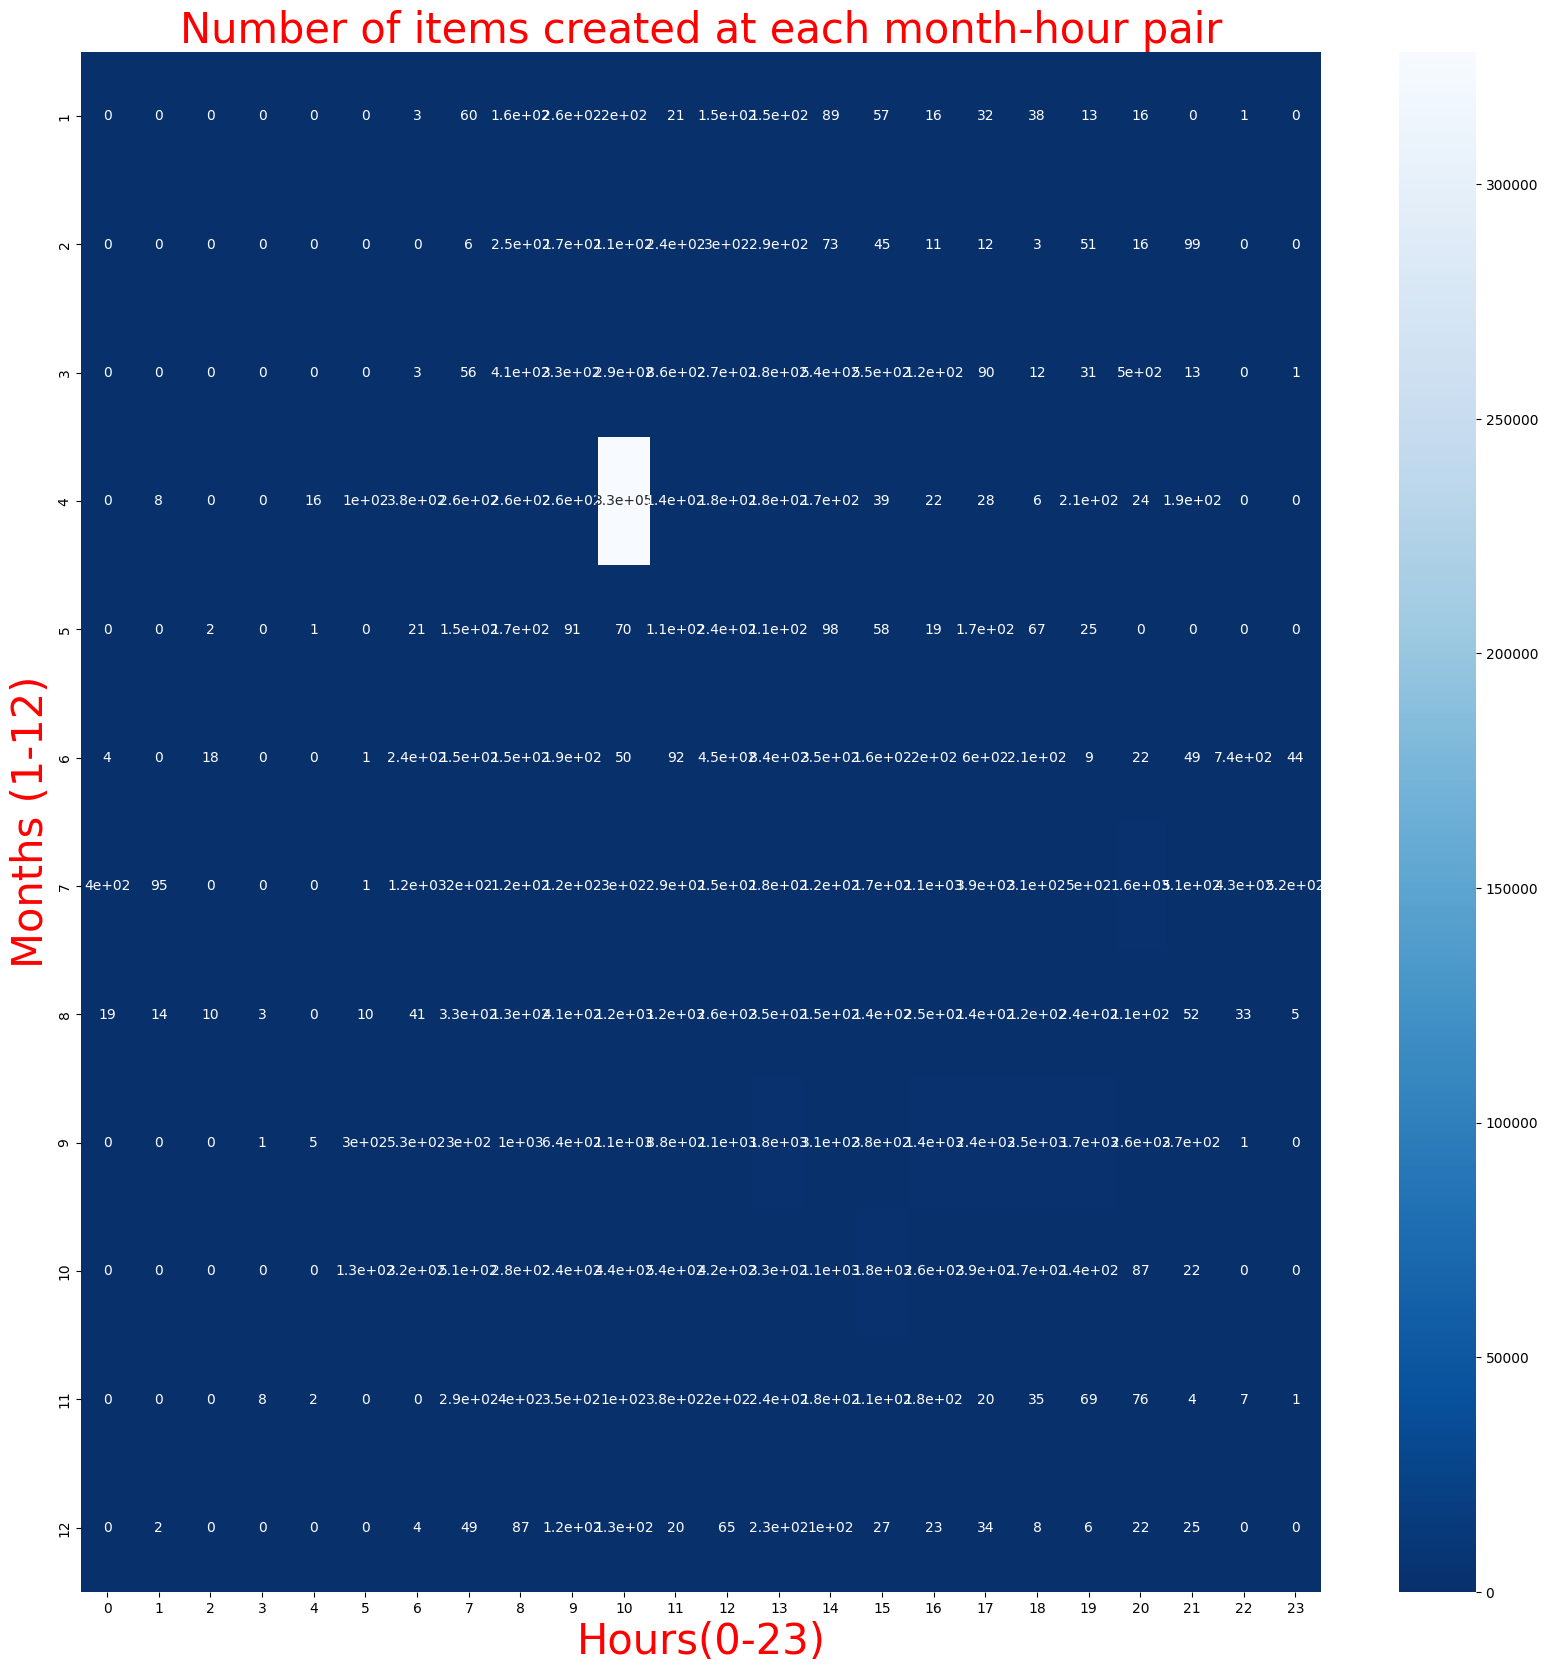

In [10]:
#I used fillna with mask. Though, they were already filled on the pivot_table

plt.figure(figsize=(20,20))

#items_pivot = items.pivot_table(index = 'month', columns = 'hour', values = 'items')
ax = sns.heatmap(items_pivot, annot = True, cmap = 'Blues_r', mask=items.fillna(value=0,inplace=True))
ax.set_ylabel('Months (1-12)', color='red', size=30)
ax.set_xlabel('Hours(0-23)', color='red', size=30)
ax.set_title('Number of items created at each month-hour pair',color='red', size=30);

### Heatmap observations

Frankly, I don't know if the result of this heatmap is correct. Firstly, there are many Zeros (filled by Nan).

We see many Zeros, since there were many Nan values that were filled on the pivot_table. As we noticed on the previous step, most part of the production is concentrated between 6am and 7pm. Which are industrial working hours. 

On the initial attempts to plot this heatmap, it was able to see a scale of blue colors in the cells. 

At the moment I increased the figsize till 20 to prevent overlapping numbers, all the cells are almost the same color (dark/navy blue), that could be a reflection of many similar values (Zeros).

A remarkable event is the **White rectangle** on the middle of the heatmap: April, between 10-11 am. Among aggregated values.

Brighter colors (white, aliceBlue), indicate a stronger positive correlation, while darker colors (e.g., navy blue) indicate a stronger negative correlation. Darker we have, they're less correlated.

I didn't expect that kind of values in the cells of the heatmap. That's the result of the **aggregated count** (e.g 1.147000e+03)

Ex: "The number 2.69324241e-09 is using scientific notation and e−09 stands for 10−09. Hence 2.69324241e−09=2.69324241×10(raised to power−09)=0.00000000269324241. (explanation about these numbers found on the course questions.

___________________________

Just for my own information.

"The closest one-dimensional analogues for the heatmap are the bar chart and histogram, corresponding to categorical and numeric data, respectively. For these charts, bar lengths are indicators of value, instead of color."

https://www.atlassian.com/data/charts/heatmap-complete-guide

### Let's start the second part of Task E

Firstly, we need to count how many values occur in a month Pandas

https://stackoverflow.com/questions/64391842/count-how-many-values-occur-in-a-month-pandas

In [11]:
#Task requires yyyy-mm format
# Convert date to type (datetime64[ns])

items['date']=pd.to_datetime(items['date'], format= '%Y/%m/%d')

In [12]:
#https://stackoverflow.com/questions/64391842/count-how-many-values-occur-in-a-month-pandas
#convert the date to string with Year + Month:

items['date'] = items['date'].dt.strftime('%Y-%m')

In [13]:
#Check what we have after strftime() method

items.head()

,country,created_at,date,time,year,month,day,hour
0,CH,2016-06-01 11:42:22.908000+00:00,2016-06,11:42:22.908000,2016,6,1,11
1,CH,2016-06-01 11:42:25.111000+00:00,2016-06,11:42:25.111000,2016,6,1,11
2,CH,2016-06-01 11:42:25.900000+00:00,2016-06,11:42:25.900000,2016,6,1,11
3,CH,2016-06-01 11:42:26.184000+00:00,2016-06,11:42:26.184000,2016,6,1,11
4,CH,2016-06-01 11:42:26.350000+00:00,2016-06,11:42:26.350000,2016,6,1,11


In [14]:
#'Series' object has no attribute 'stack'

items_grp = items.groupby(['date'])['country'].value_counts().unstack().fillna(0).astype(int)

In [15]:
#https://stackoverflow.com/questions/19124601/pretty-print-an-entire-pandas-series-dataframe

print(items_grp.to_string())

country  AT    CH    DE  FR    IT  UK      US
date                                         
2016-05   0    20     0   0     0   0       0
2016-06   0  1082     0   0     0   0       0
2016-07   0  7395     0   0     0   0       0
2016-08   0   291     0   0     0   0       0
2016-09   0  5382     0   0     0   0       0
2016-11   0   400     0   0     0   0       0
2016-12   0   105     0   0     0   0       0
2017-01   0    17     0   0     0   0       0
2017-02   0   153     0   0     0   0       0
2017-03   0  1140     0   0     0   0       0
2017-04   0   813     0   0     0   0       0
2017-06   0  1487     0   0     0   0       0
2017-09   0   682     0   0     0   0       0
2017-10   0   630     0   0     0   0       0
2017-11   0   968     0   0     0   0       0
2017-12   0   532     0   0     0   0       0
2018-01   0   608     0   0     0   0       0
2018-02   0   320     0   0     0   0       0
2018-03   0  1441     0  29    13   0       0
2018-04   0   622     1  10     9 

### Transpose to make it easier to copy the values.

In [16]:
#Transpose grouped items so that it will be easier to copy/paste their values, to write on the chart axis  

items_grp.T

date,2016-05,2016-06,2016-07,2016-08,2016-09,2016-11,2016-12,2017-01,2017-02,2017-03,...,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10
country,,,,,,,,,,,,,,,,,,,,,
AT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CH,20,1082,7395,291,5382,400,105,17,153,1140,...,176,190,297,406,275,247,262,217,6490,4410
DE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,12,0,0,0,0,0,0
FR,0,0,0,0,0,0,0,0,0,0,...,1,1,2,1,0,2,0,0,8,0
IT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
UK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
US,0,0,0,0,0,0,0,0,0,0,...,0,0,0,328221,21,25,0,3,0,0


### I decided to copy dates and coutries values in case I jinxed them with some flaw

Seven countries and 62 entries by date it's easy to delete numbers instead of the the spaces.

Maybe, there is an easier and faster way to deliver that.

In [17]:
#Dates yyyy-mm format that will be on the x-axis

X_AXIS = ('2016-05', '2016-06', '2016-07','2016-08', '2016-09','2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-06', '2017-09','2017-10','2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08', '2019-09','2019-10', '2019-11','2019-12', '2020-01', '2020-02', '2020-03','2020-04','2020-05','2020-06', '2020-07','2020-08', '2020-09','2020-10','2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10')

### As I mentioned above, there should be an easier way to define these values

I wrote separately first, in case I make some mistake with such amount of values.

In [18]:
#Values of the products created monthly by each country

data = {'AT': (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),
        'CH': (20, 1082,7395,291,5382,400,105,17,153,1140,813,1487,682,630,968,532,608,320,1441,622,188,170,597,1039,92,90,105,94,137,56,161,226,237,142,198,142,118,304,333,81,165,107,201,197,249,164,125,177,139,283,170,72,176,190,297,406,275,247,262,217,6490,4410),
        'DE': (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3302,4030,1424,659,0,4,236,777,194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0),
        'FR': (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,10,2,2,1,4,3,31,1,0,13,4,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,1,1,2,1,0,2,0,0,8,0),
        'IT': (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,9,402,1266,0,2,1,3,1,69,148,612,192,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),
        'UK': (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),
        'US': (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,2,0,0,0,328221,21,25,0,3,0,0)}

## Task E2. Stacked Bar plot

"Your task is to investigate the evolution of the total number of items over time. You should draw a bar plot with the date (e.g., in **yyyy-mm format) on the x-axis** and the total number of items created during each month on the  **y-axis**. Each bar in the plot should stack the number of items created by each country each month. Please make sure all bars are visible by choosing the appropriate scale for the y-axis. "

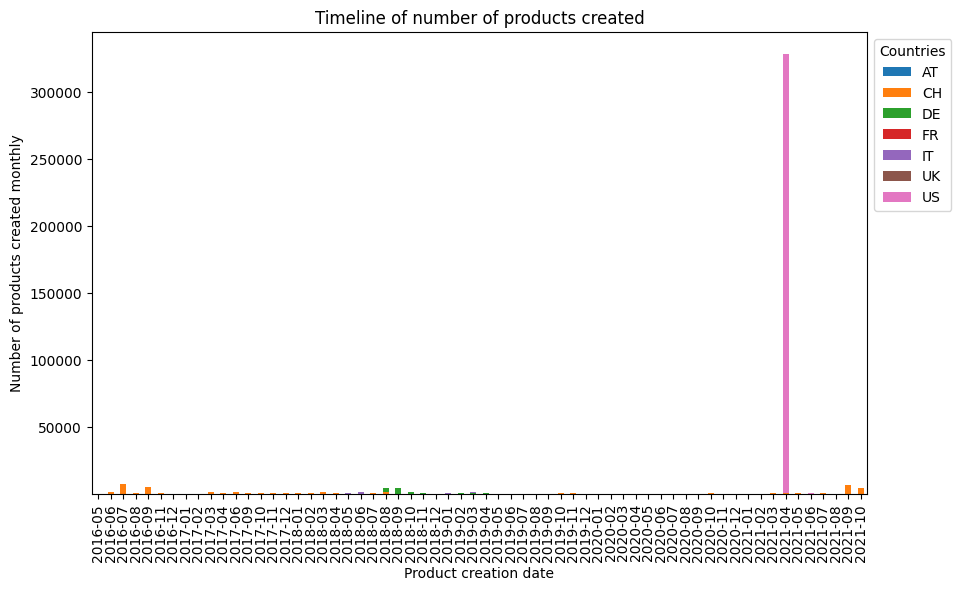

In [19]:
#https://stackoverflow.com/questions/74355080/how-to-change-date-format-in-line-chart-in-python-to-yyyy-mm-only
#https://stackoverflow.com/questions/44309507/stacked-bar-plot-using-matplotlib
#Answered by Bill in May 7, 2018

   
X_AXIS = ('2016-05', '2016-06', '2016-07','2016-08', '2016-09','2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-06', '2017-09','2017-10','2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08', '2019-09','2019-10', '2019-11','2019-12', '2020-01', '2020-02', '2020-03','2020-04','2020-05','2020-06', '2020-07','2020-08', '2020-09','2020-10','2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10')


index = pd.Index(X_AXIS, name='Timeline of number of products created')#without index I got an error

data = {'AT': (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),
        'CH': (20,1082,7395,291,5382,400,105,17,153,1140,813,1487,682,630,968,532,608,320,1441,622,188,170,597,1039,92,90,105,94,137,56,161,226,237,142,198,142,118,304,333,81,165,107,201,197,249,164,125,177,139,283,170,72,176,190,297,406,275,247,262,217,6490,4410),
        'DE': (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3302,4030,1424,659,0,4,236,777,194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0),
        'FR': (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,10,2,2,1,4,3,31,1,0,13,4,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,1,1,2,1,0,2,0,0,8,0),
        'IT': (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,9,402,1266,0,2,1,3,1,69,148,612,192,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),
        'UK': (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),
        'US': (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,2,0,0,0,328221,21,25,0,3,0,0)}

#plt.legend(loc=(1.04, 1))   #StackOverFlow


df = pd.DataFrame(data, index=index)

ax = df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Number of products created monthly')
ax.set_xlabel('Product creation date')
ax.legend(title='Countries' , bbox_to_anchor=(1.0, 1), loc='upper left')

plt.title('Timeline of number of products created')#The index didn't show the title
plt.show()

### Observations of the Stacked Bar chart

There are so many zeros that's hard even to notice where ANY value was stacked. 

Exception, August, 2018 where there is a tiny bar with two (2) colors orange(CH)/green(DE).

On April, 2021 the pink bar shows a significant US 328221 entries/products. 

Very likely, it was a **COVID-19** effect (products scarcity which required to import items) that affected the whole World.

The relevant green bars German (Deutschland) products on 2018 (August-September)

The orange small bars are Switzerland products that are (expected to be) constant from 2016,may) - 2021,october.

## Appendix

### Things that I tried, then were discarded.

 
 I tried transform ('count') though the groupby prevented me to split dates, additionally it replicated information.
 
 Example df['Counts'] = df.groupby(['Color'])['Value'].transform('count')
 
 Note that transform('count') ignores NaNs. If you want to count NaNs, use transform(len).
 
 I wrote about the groupby/transform('count') method only to remember that firstly it seemed to work. Though it repercuted in many errors on the next steps. Then, I applied **map/value_counts** below. Which was ditched too. Cause the solution was the pivot_table. 

In [46]:
#Save for another time cause Solution applied pivot_table.

#https://stackoverflow.com/questions/17709270/create-column-of-value-counts-in-pandas-dataframe
#Comment by SACUL (21)Jul 13, 2018 at 20:15  copied by Asclepius


#Map entries in 'country' to value_counts 
#Store result in new column 'items'

#df['items'] = df['country'].map(df['country'].value_counts())

### Lessons learned on this E1 task

Time data "2016-06-01T11:42:22.908Z" doesn't match format "%Y-%m-%d %H:%M:%S", at position 0. 

I don't know why groupby replicated things. Mostly when handling object columns. That includes the groupby and transform method. which made me repeat the task many, many times.

Don't need to drop columns. Better define the sub-dataframes. 

We can use **map** to create a numerical column applying value_counts to object features. And a new columns will be created on our Pandas Dataframe.

We can use aggregate function to our pivot_table in case of duplicate errors.
By default it's **mean**. Though we can use also, tupple, **aggfunc=np.ptp** 

Just pivot instead of pivot_table will aggregate with non-numerical columns.

Use **annot=True** to plot the numbers inside the heatmap.

There are more cause I faced many issues till I was able to plot the heatmap.

I tried on the stacked barchart: stacked = items.groupby(['date'])['country'].value_counts().unstack().fillna(0).astype(int).reindex()